# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

<AxesSubplot:>

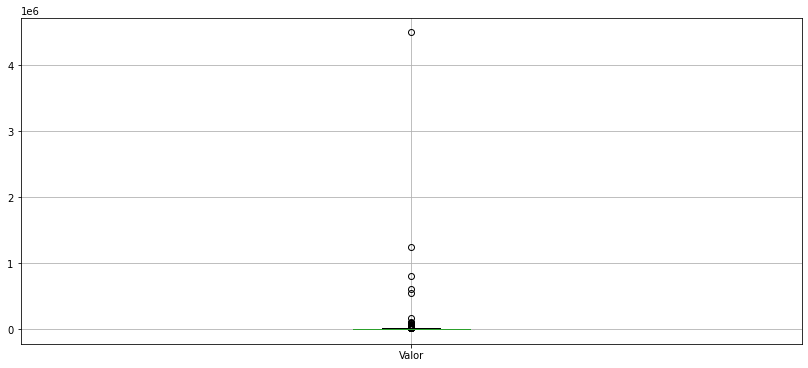

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [5]:
valor = dados['Valor']

In [16]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [17]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

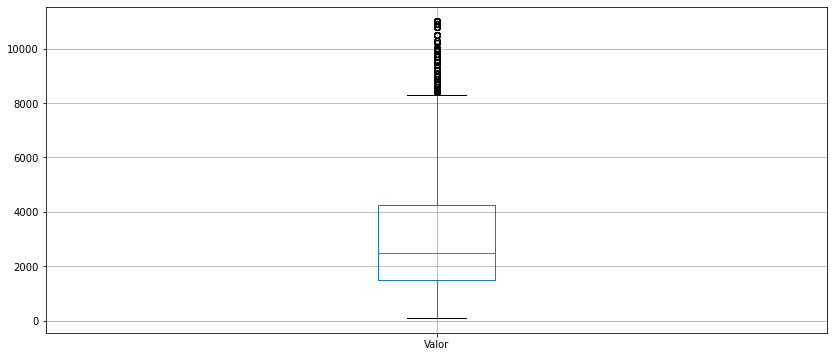

In [18]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

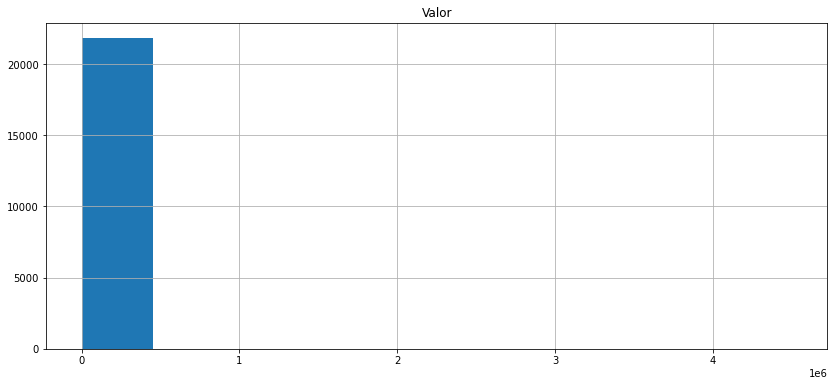

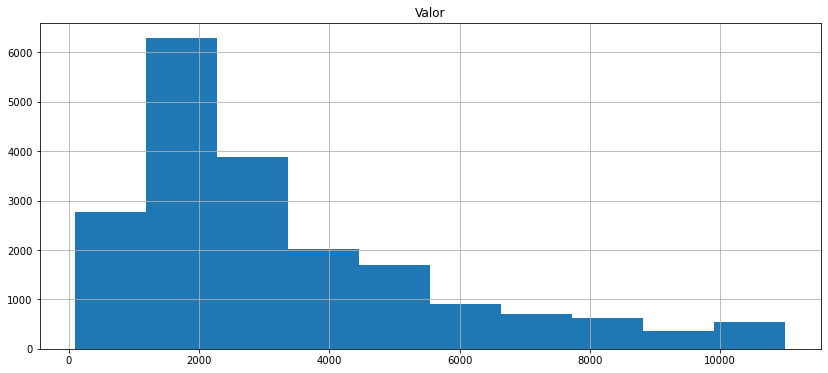

In [20]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

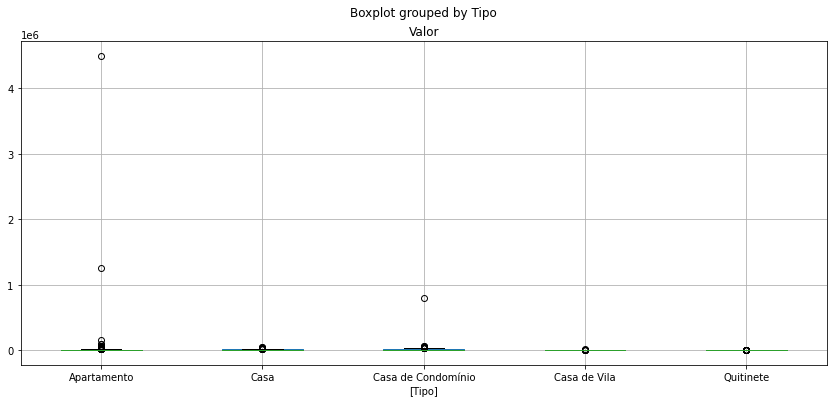

In [32]:
dados.boxplot(['Valor'], by=['Tipo'])

In [35]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [36]:
type(grupo_tipo)

pandas.core.groupby.SeriesGroupBy

In [37]:
grupo_tipo.groups

{'Apartamento': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
            dtype='int64', length=8613),
 'Casa': Int64Index([  13,   31,   50,   54,   74,  109,  115,  123,  127,  172,
             ...
             9667, 9723, 9750, 9783, 9831, 9861, 9870, 9888, 9894, 9903],
            dtype='int64', length=426),
 'Casa de Condomínio': Int64Index([  69,   71,   72,   76,   93,  117,  118,  122,  128,  215,
             ...
             9657, 9670, 9689, 9691, 9746, 9770, 9784, 9898, 9920, 9981],
            dtype='int64', length=454),
 'Casa de Vila': Int64Index([  23,   53,   91,  269,  444,  627,  809,  836,  871, 1081,
             ...
             9132, 9177, 9239, 9260, 9264, 9345, 9601, 9707, 9889, 9959],
            dtype='int64', length=117),
 'Quitinete': Int64Index([  28,   45,   57,   65,   67,  137,  155,  162,  174,  222,
             ...
             9647, 

In [38]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [39]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64

In [40]:
Q3

Tipo
Apartamento            5000.0
Casa                   9000.0
Casa de Condomínio    16000.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [41]:
IIQ

Tipo
Apartamento            3300.0
Casa                   7900.0
Casa de Condomínio    12075.0
Casa de Vila           1000.0
Quitinete               600.0
Name: Valor, dtype: float64

In [42]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -10750.0
Casa de Condomínio   -14187.5
Casa de Vila           -700.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [43]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  20850.0
Casa de Condomínio    34112.5
Casa de Vila           3300.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [44]:
limite_superior['Casa']

20850.0

<img src="Box-Plot.png" width=70%>

In [46]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

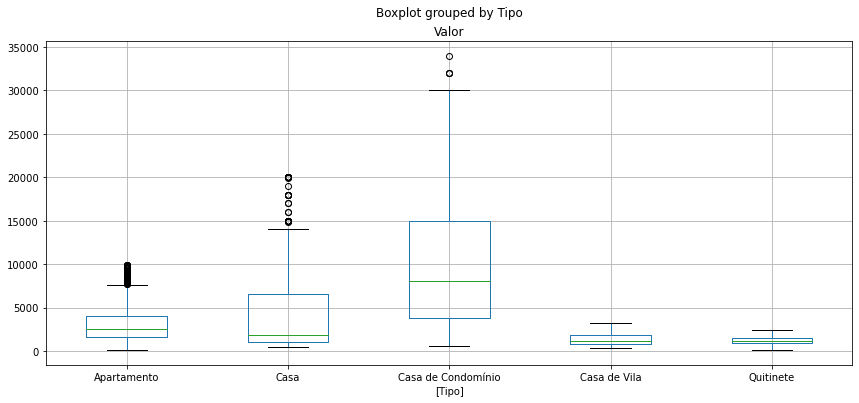

In [47]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [48]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)